<a href="https://colab.research.google.com/github/SiyiGit/github_actions/blob/main/CNN_model%2004172024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#install opendatasets
!pip install opendatasets

In [4]:
#import libraries
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import seaborn as sns

In [5]:
#kaggle dataset download
od.download("https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alicjasosialuk
Your Kaggle Key: ··········


100%|██████████| 2.70G/2.70G [00:29<00:00, 98.4MB/s]


In [ ]:
#just for info{"username":"alicjasosialuk","key":"fa69bfa4724b0a10006ba687db303759"}

In [6]:
#path to datasets
data_dir_train = './new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
data_dir_val = './new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
data_dir_test = './new-plant-diseases-dataset/test/test'

In [7]:
## Defining batch specfications
batch_size = 200
img_height = 256
img_width = 256

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, MaxPooling2D, Conv2D, Activation, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

from sklearn import metrics

In [11]:
# Loading training set
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
train_data = train_datagen.flow_from_directory(data_dir_train,
                                              batch_size=batch_size,
                                              target_size=(img_height, img_width),
                                              class_mode = 'categorical',
                                              shuffle=True)

Found 70295 images belonging to 38 classes.


In [12]:
## loading validation set
val_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_data = val_datagen.flow_from_directory(data_dir_val,
                                            batch_size=batch_size,
                                            target_size=(img_height, img_width),
                                            class_mode = 'categorical',
                                            shuffle=False)

Found 17572 images belonging to 38 classes.


In [13]:
## loading test set
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(data_dir_test,
                                            batch_size=batch_size,
                                            target_size=(img_height, img_width),
                                            class_mode = 'categorical',
                                            shuffle=False)

Found 0 images belonging to 0 classes.


In [40]:
## Defining model layers
inputs = Input(shape = (img_width, img_height,3), name = "Input")

first_layer = Conv2D(filters = 32,
                     kernel_size = (5, 5),
                     padding = 'valid',
                     activation = 'relu')

second_layer = MaxPooling2D(pool_size = (2, 2))

third_layer = Dropout(rate = 0.2)

fourth_layer = Flatten()

fifth_layer = Dense(units = 256,
                    activation = 'relu')

sixth_layer = Dense(units = 128,
                    activation = 'relu')


output_layer = Dense(units = 38,
                     activation='softmax')

x=first_layer(inputs)
x=second_layer(x)
x=third_layer(x)
x=fourth_layer(x)
x=fifth_layer(x)
x=sixth_layer(x)
outputs=output_layer(x)

cnn_model = Model(inputs = inputs, outputs = outputs)



In [35]:
def create_model():
    model = Sequential([
        Conv2D(filters=64, kernel_size=(5, 5), padding='valid', input_shape=(img_width, img_height, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),

        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Flatten(),

        Dense(units=256, activation='relu'),
        Dropout(0.5),
        Dense(units=128, activation='relu'),
        Dropout(0.5),
        Dense(units=38, activation='sigmoid')
    ])

    return model

In [36]:
#cnn_model = create_model()

In [41]:
cnn_model.compile(loss='categorical_crossentropy', # loss function
                  optimizer='adam',                # gradien descent algorithm
                  metrics=['accuracy'])           # accuracy metric)


In [42]:
print(cnn_model.summary())


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 32)        2432      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 48, 48, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 73728)             0         
                                                                 
 dense_7 (Dense)             (None, 256)               18874624  
                                                           

In [1]:
training_history = cnn_model.fit(train_data,
                                 validation_data= val_data,
                                 epochs = 40,
                                 batch_size = 100)

NameError: name 'cnn_model' is not defined

In [23]:
train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

train_loss = training_history.history['loss']
val_loss = training_history.history['val_loss']

#learning_rate = training_history.history['lr']

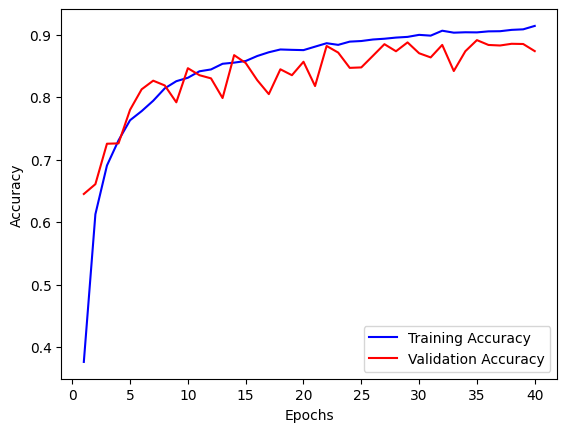

In [28]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


plt.plot(np.arange(1 , 41, 1),
         train_acc,
         label = 'Training Accuracy',
         color = 'blue')


plt.plot(np.arange(1 , 41, 1),
         val_acc,
         label = 'Validation Accuracy',
         color = 'red')

plt.legend()

plt.show()

In [31]:
test_pred = cnn_model.predict(val_data)

test_pred_class = test_pred.argmax(axis = 1)
#y_test_class =val_data.argmax(axis = 1)

print(metrics.classification_report(val_data, test_pred_class))

88/88 [==============================] - 20s 230ms/step


ValueError: Found input variables with inconsistent numbers of samples: [88, 17572]

In [34]:
val_data

In [ ]:
cnn_model.save("model.h5")
from tensorflow.keras.models import load_model

cnn_model = load_model("/kaggle/working/model.h5")